In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
)

In [4]:
import helper as helper

X, y = helper.load_data()   

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=helper.RANDOM_STATE, stratify=y
)

X_train = helper.pre_process_training_data_cylic(X_train_raw)
X_test = helper.pre_process_training_data_cylic(X_test_raw)

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report


# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("qda", QuadraticDiscriminantAnalysis())
])

# Grid (main hyperparameter is regularization)
param_grid = {
    "qda__reg_param": [0.0, 0.01, 0.1, 0.5, 1.0]
}

# Grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best params: {'qda__reg_param': 0.5}
Best CV score: 0.6552180186962795
Test accuracy: 0.85
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       262
           1       0.56      0.81      0.66        58

    accuracy                           0.85       320
   macro avg       0.76      0.83      0.78       320
weighted avg       0.88      0.85      0.86       320



/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Users/tlindberg/Desktop/smask/.venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the va

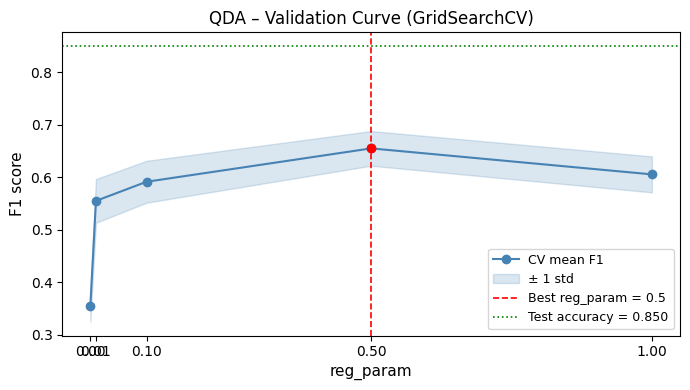

In [6]:
#Generated with CLAUDE AI

# ── Extract results from GridSearchCV ──────────────────────
results = pd.DataFrame(grid.cv_results_)
reg_params = results["param_qda__reg_param"].astype(float)
mean_scores = results["mean_test_score"]
std_scores  = results["std_test_score"]

# ── Plot ───────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(reg_params, mean_scores, marker="o", color="steelblue",
        label="CV mean F1", zorder=3)
ax.fill_between(reg_params,
                mean_scores - std_scores,
                mean_scores + std_scores,
                alpha=0.2, color="steelblue", label="± 1 std")

# Mark the best parameter
best_reg  = grid.best_params_["qda__reg_param"]
best_score = grid.best_score_
ax.axvline(best_reg, color="red", linestyle="--", linewidth=1.2,
           label=f"Best reg_param = {best_reg}")
ax.scatter([best_reg], [best_score], color="red", zorder=5)

# Test accuracy as a horizontal reference line
test_acc = accuracy_score(y_test, y_pred)
ax.axhline(test_acc, color="green", linestyle=":", linewidth=1.2,
           label=f"Test accuracy = {test_acc:.3f}")

ax.set_xlabel("reg_param", fontsize=11)
ax.set_ylabel("F1 score", fontsize=11)
ax.set_title("QDA – Validation Curve (GridSearchCV)", fontsize=12)
ax.legend(fontsize=9)
ax.set_xticks(reg_params)
plt.tight_layout()
plt.savefig("qda_validation_curve.png", dpi=150)
plt.show()


In [7]:
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
)

In [8]:
cv_scores = cross_val_score(boost, X_train, y_train, cv=CV, scoring='accuracy')
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)

NameError: name 'boost' is not defined

In [ ]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Test Accuracy', ascending=False)
results_df = results_df.round(4)

print('Model Comparison (sorted by Test Accuracy):')
display(results_df)